<a href="https://colab.research.google.com/github/zniero1324/21370658_Programming_Assignment_ISYS5002/blob/main/2023_S2_Flu_Tracker_Kasilag_21370658.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Programming Assignment

**Due: Sunday 3rd September**

## **Problem Statement:**
During the flu season, it is crucial for healthcare organisations to accurately monitor and analyse the number of infected patients to effectively respond to potential outbreaks. To streamline this process, a software solution needs to be designed and developed that allows users to input daily reported infection numbers over the course of a week. The program should then provide key statistical insights such as the total, average, smallest, and largest of these values and a graphical representation to visualise the trend of infection counts throughout the week.


**Before you start:**

* setup the **new private repo** and **invite isys5002.itp@gmail.com** as a **collaborator** to your private GitHub repository.
* **Download** the attached .ipynb notebook and **rename** it to ***2023_S1_Flu_Tracker_[name]_[studentID]***
* Save the renamed notebook to your private GitHub repository.
* Copy and paste the **repository/notebook link** in the **ANSWER textbox on Blackboard**.

**Task:**

Following the **six-steps problem-solving methodology**, **design and implement** the solution following good programming practices, such as modularising code, validating inputs, handling errors properly, and adhering to the [PEP8](https://peps.python.org/pep-0008/) style guide.

Adhering to PEP8 standards:
* programming style naming conventions used in the PEP8, which include:
  * Meaningful names for projects, variables, methods, and controls.
  * Correct capitalisation of variables and methods
* Appropriate use of comments
* Reference any relevant forums, websites, and videos that you used.
* Use of space and indentation to the program is easy to read.

# **ANSWER**

In [1]:
!pip install PyInputPlus
!pip install pandas

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyInputPlus: filename=PyInputPlus-0.2.12-py3-none-any.whl size=11295 sha256=abf7edc30d42f9a5e0eb83f35540847de0cca33501e8a09c525178efbd40f821
  Stored in directory: /root/.cache/pip/wheels/13/ec/a5/f780c8008b74e885aada43369ebf4d350edfd12bb5909ccb23
  Created wheel for pysimplevalidate: filename=PySimpleValidate-0.2.12-py3-none-any.whl size=16177 sha256=39be86c1b10e88a26d19d40c45f005b490f46ec936c953a7b1fa8a9bf26b0bfb
  Stored in directory: /root/.cache/pip/wheels/64/29/c9/2ee861e5b0775e289013b7c7157e0bdcea3a1b844f835b2eb8
  Created wheel for stdiomask: filename=stdiomask

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as pt
import pyinputplus as monitor

contain_data_list = []  # List to contain all start date of the week we will input.
no_of_infected_per_week = []  # List to the no. of infected people.
today = datetime.date.today()
year = today.year
days = 7


def data_of_patient(no_of_days):
    # Loop the number input from the no_of_entries.
    for entries in range(no_of_days):
        # Input the number the dates of the week by "mm/dd".
        dates = monitor.inputDate("Please input the date? ", formats=['%m/%d'])
        no_of_infected = monitor.inputNum("Please input the number of infected? ")

        # Insert function to insert the objects inside the list we declared.
        # `strftime` function converts datetime into string.
        contain_data_list.insert(entries, dates.strftime('%m/%d'))
        no_of_infected_per_week.insert(entries, no_of_infected)

    return contain_data_list, no_of_infected_per_week


# Function to put our data in a file, and returns the x and y-axis of our plot
def output_data(date_list, infected_per_week):
    # Exception handler, in case the File is not found in the System.
    path = 'data.csv'  # variable contain the name of our file.

    data = {'Date': date_list,
            'Number of Infected Patient': infected_per_week}

    df = pd.DataFrame(data)
    df.to_csv(path, index=False)

    get_df = pd.read_csv(path)
    date_in_week = get_df['Date']
    data_in_week = get_df['Number of Infected Patient']

    return date_in_week, data_in_week


# Takes the 2 list parameter, and print the min
def print_output(w_date, w_data):
    w_average = round(sum(w_data) / len(w_data), 2)
    w_total = sum(w_data)

    # Print out the total statistics
    print('\n\n ====  Total Statistics === \n')
    print('Total infected people in a week: ', w_total)
    print('Maximum infected people in a week: ', w_data.max())
    print('Minimum infected people in a week: ', w_data.min())
    print('Average infected people in a week: ', w_average)

    all_data = {'x': w_date,
                'y': w_data}

    plot_df = pd.DataFrame(all_data)
    pt.plot(plot_df['x'], plot_df['y'], marker='o')  # 'o' specifies markers on data points
    pt.title(f'Flu Tracker Line Graph {year}')
    pt.xlabel('\nFlu Tracker Dates\n')
    pt.ylabel('Number of Infected People')
    pt.grid(True)
    pt.show()

Please input the date? 09/01
Please input the number of infected? 31
Please input the date? 09/02
Please input the number of infected? 54
Please input the date? 09/03
Please input the number of infected? 55
Please input the date? 09/04
Please input the number of infected? 67
Please input the date? 09/05
Please input the number of infected? 09/06
'09/06' is not a number.
Please input the number of infected? 45
Please input the date? 09/06
Please input the number of infected? 77
Please input the date? 09/07
Please input the number of infected? 48


 ====  Total Statistics === 

Total infected people in a week:  377
Maximum infected people in a week:  77
Minimum infected people in a week:  31
Average infected people in a week:  53.86


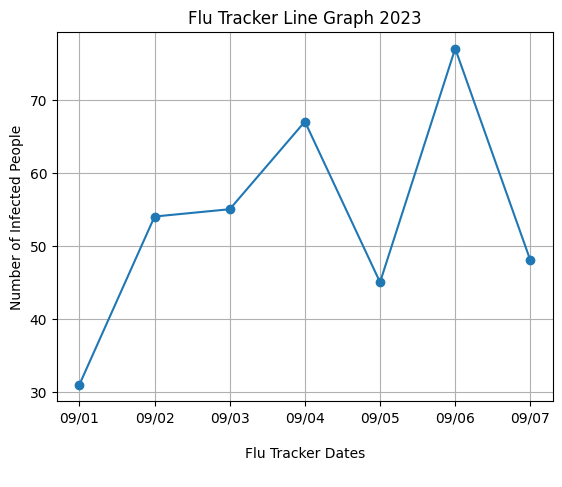

In [5]:
contain_data_list, no_of_infected_per_week = data_of_patient(days)
week_date, week_data = output_data(contain_data_list, no_of_infected_per_week)
print_output(week_date, week_data)